In [1]:
import rebound
import sys
#update next line to path where you installed SBDynT:
sys.path.insert(0, '/Users/kvolk/Documents/GitHub/SBDynT/src')
import sbdynt as sbd

%matplotlib inline

In [2]:
#we will pull the orbit fit for TNO 225088 (Gonggong) and generate 10 clones
sbody = '225088'
nclones = 10
#Gonggong is currently in the 10:3 MMR, and we will plot that resonant argument later using these variables:
res_p = 10
res_q = 3
#run an initial simulation to 10 Myr outputting every 500 years
tmax = 1e7
tout = 2e3
#save it to a rebound simulation archive file:
archivefile = sbody+"-archive.bin"

In [3]:
#set up an empty simulation
sim= rebound.Simulation()

#initialize the 4 giant planets and the TNO+clones
flag, epoch, sim = sbd.initialize_simulation(planets=['Jupiter','Saturn','Uranus','Neptune'],
                                                 des=sbody,clones=nclones)

#run the simulation, creating a new simulation archive (deleting the file if it already exists!)
flag, sim = sbd.run_simulation(sim, tmax=tmax, tout=tout,filename=archivefile,deletefile=True)

/Users/kvolk/opt/anaconda3/envs/sbdynt/lib/python3.9/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


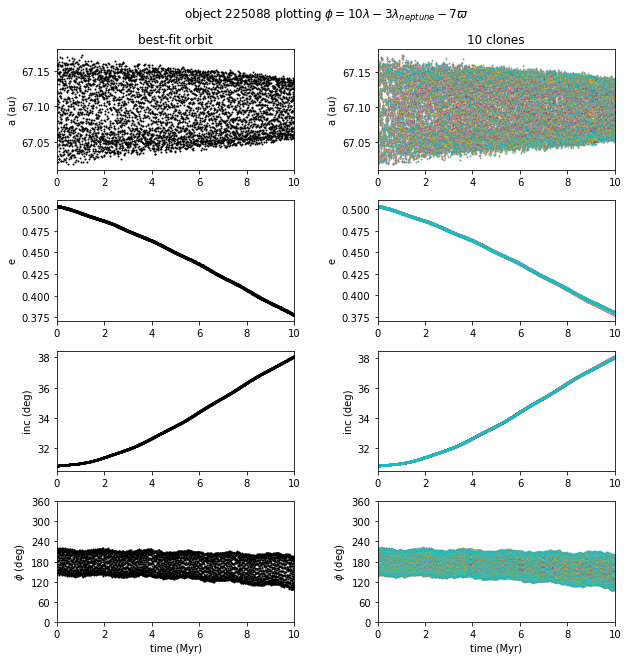

In [4]:
#read and plot the results (a pre-computed example is included in the repository!
#when you run this, it won't match exactly since different clones will be generated, 
#but barring a major orbit-fit update since April 2024, it should look similar!)
(flag, a, e, inc, node, aperi, ma, phi, t,res_str) = sbd.read_sa_for_resonance(
                            sbody=sbody,
                            archivefile=archivefile,planet='neptune',
                            p=10,q=3,nclones=nclones)
flag, fig1 = sbd.plot_resonance(
                            sbody=sbody,
                            res_string=res_str,
                            a=a,e=e,inc=inc,phi=phi,t=t,nclones=nclones,
                            figfile='10Myr-example-resonance-plot.png')

In [5]:
#see what fraction of time each clone is librating based 1 Myr windows
##THIS IS NOT A SUPER WELL-TESTED ROUTINE! So use at your own risk, it's just here as an example
flag,a_stats, e_stats, i_stats, phi_stats, fwindows = sbd.analyze_res(
                        tmin=0.,tmax=tmax,dtwindow = 1e6,
                        a=a, e=e, inc=inc, phi=phi, t=t,nclones=10)
for i in range(0,nclones+1):
    print("Clone %d had average a, e, i: %0.2f au, %0.3f, %0.3f rad " % (i, a_stats[i,0], e_stats[i,0], i_stats[i,0]) )
    print("     average delta phi: %0.3f rad" %  phi_stats[i,2])
    print("     and librated %.1f%% of the timespan" % (100*fwindows[i]))


Clone 0 had average a, e, i: 67.10 au, 0.447, 0.590 rad 
     average delta phi: 1.572 rad
     and librated 100.0% of the timespan
Clone 1 had average a, e, i: 67.10 au, 0.447, 0.590 rad 
     average delta phi: 1.567 rad
     and librated 100.0% of the timespan
Clone 2 had average a, e, i: 67.10 au, 0.447, 0.590 rad 
     average delta phi: 1.645 rad
     and librated 100.0% of the timespan
Clone 3 had average a, e, i: 67.10 au, 0.447, 0.590 rad 
     average delta phi: 1.594 rad
     and librated 100.0% of the timespan
Clone 4 had average a, e, i: 67.10 au, 0.447, 0.590 rad 
     average delta phi: 1.568 rad
     and librated 100.0% of the timespan
Clone 5 had average a, e, i: 67.10 au, 0.447, 0.590 rad 
     average delta phi: 1.585 rad
     and librated 100.0% of the timespan
Clone 6 had average a, e, i: 67.10 au, 0.447, 0.590 rad 
     average delta phi: 1.582 rad
     and librated 100.0% of the timespan
Clone 7 had average a, e, i: 67.10 au, 0.447, 0.590 rad 
     average delta 

In [6]:
#run the simulation longer, saving less frequently (*not* deleting the file if it already exists!)
#(This takes a little while to run!)
tmax = 1e8
tout = 1e4
flag, sim = sbd.run_simulation(sim, tmax=tmax, tout=tout,filename=archivefile,deletefile=False)

/Users/kvolk/opt/anaconda3/envs/sbdynt/lib/python3.9/site-packages/rebound/simulation.py:254: RuntimeWarning: File in use for Simulationarchive already exists. Snapshots will be appended.
  warnings.warn(msg[1:], RuntimeWarning)


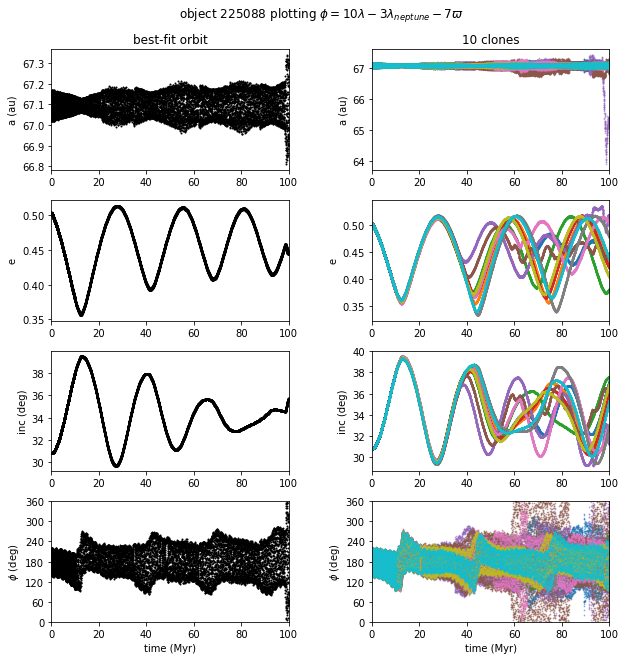

In [7]:
#read and plot the results with the added time (a pre-computed example is included in the repository!
#when you run this, it won't match exactly since different clones will be generated, 
#but barring a major orbit-fit update since April 2024, it should look similar!)
(flag, a, e, inc, node, aperi, ma, phi, t,res_str)  = sbd.read_sa_for_resonance(
                            sbody=sbody,
                            archivefile=archivefile,planet='neptune',
                            p=10,q=3,nclones=nclones)
flag, fig2 = sbd.plot_resonance(
                            sbody=sbody,
                            res_string=res_str,
                            a=a,e=e,inc=inc,phi=phi,t=t,nclones=nclones,
                            figfile='100Myr-example-resonance-plot.png')

In [8]:
#see what fraction of time each clone is librating based 5 Myr windows
##THIS IS NOT A SUPER WELL-TESTED ROUTINE! So use at your own risk, it's just here as an example
flag,a_stats, e_stats, i_stats, phi_stats, fwindows = sbd.analyze_res(
                        tmin=0.,tmax=1e8,dtwindow = 5e6,
                        a=a, e=e, inc=inc, phi=phi, t=t,nclones=10)
for i in range(0,nclones+1):
    print("Clone %d had average a, e, i: %0.2f au, %0.3f, %0.3f rad " % (i, a_stats[i,0], e_stats[i,0], i_stats[i,0]) )
    print("     average delta phi: %0.3f rad" %  phi_stats[i,2])
    print("     and librated %.1f%% of the timespan" % (100*fwindows[i]))


caution: uneven time sampling for the windows
Clone 0 had average a, e, i: 67.10 au, 0.452, 0.596 rad 
     average delta phi: 2.643 rad
     and librated 100.0% of the timespan
Clone 1 had average a, e, i: 67.10 au, 0.452, 0.597 rad 
     average delta phi: 2.841 rad
     and librated 100.0% of the timespan
Clone 2 had average a, e, i: 67.10 au, 0.448, 0.597 rad 
     average delta phi: 1.909 rad
     and librated 100.0% of the timespan
Clone 3 had average a, e, i: 67.10 au, 0.448, 0.599 rad 
     average delta phi: 2.351 rad
     and librated 100.0% of the timespan
Clone 4 had average a, e, i: 67.10 au, 0.450, 0.596 rad 
     average delta phi: 2.053 rad
     and librated 100.0% of the timespan
Clone 5 had average a, e, i: 67.06 au, 0.460, 0.590 rad 
     average delta phi: 2.975 rad
     and librated 90.0% of the timespan
Clone 6 had average a, e, i: 67.06 au, 0.451, 0.598 rad 
     average delta phi: 2.514 rad
     and librated 60.0% of the timespan
Clone 7 had average a, e, i: 67.